In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000

In [0]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
import matplotlib.pyplot as plt

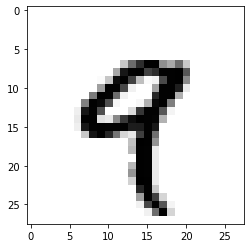

In [0]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [0]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 54us/step - loss: 0.2582 - accuracy: 0.9259
Epoch 2/5
60000/60000 [==============================] - 2s 29us/step - loss: 0.1036 - accuracy: 0.9694
Epoch 3/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0684 - accuracy: 0.9797
Epoch 4/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0499 - accuracy: 0.9853
Epoch 5/5
60000/60000 [==============================] - 2s 27us/step - loss: 0.0374 - accuracy: 0.9888


In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 67us/step


In [0]:
print('test_acc:', test_acc)

test_acc: 0.9803000092506409
